<a href="https://colab.research.google.com/github/ethandsz/MLProject/blob/main/MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **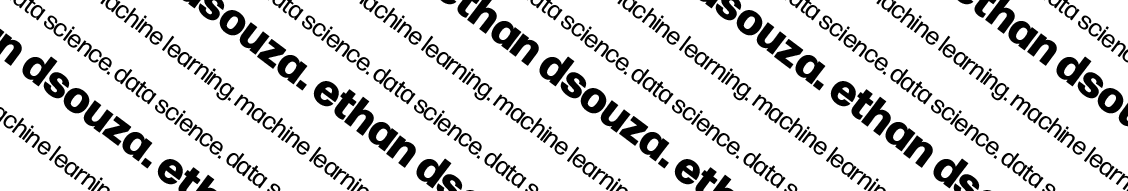News Headline Category Prediction**


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

# Importing data, exploratory analysis, and setting target column(s) for training

In [ ]:
#raw = pd.read_excel('drive/MyDrive/Headline/Headlines.xlsx')
raw = pd.read_excel('Downloads/Headlines.xlsx')

In [ ]:
raw

,Unnamed: 0,category,headline,authors,link,short_description,date
0,0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26
...,...,...,...,...,...,...,...
200848,200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28
200849,200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,NaN,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28
200850,200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",NaN,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28
200851,200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,NaN,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28


Dropping "Unnamed: 0" as it has no useful data

In [ ]:
raw.drop(columns="Unnamed: 0", inplace= True) 

Checking the number of categories and their names

In [ ]:
len(list(raw.category.unique()))

41

In [ ]:
raw.category.unique()

array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS',
       'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST', 'FIFTY', 'ARTS',
       'WELLNESS', 'PARENTING', 'HOME & LIVING', 'STYLE & BEAUTY',
       'DIVORCE', 'WEDDINGS', 'FOOD & DRINK', 'MONEY', 'ENVIRONMENT',
       'CULTURE & ARTS'], dtype=object)

In [ ]:
raw.authors.unique().size

27993

Dropping null/NaN values in the specified columns

In [ ]:
raw.dropna(subset = ['short_description', 'headline'], inplace = True) #Dropping all rows which contain Null/NaN values in the specified columns

Plot of the top 25 reported categories

In [ ]:
plt.figure(figsize=(60,24));

fig = px.bar(x = raw.category.value_counts().index[:25], y = raw.category.value_counts()[:25], labels = {
    "x": "Categories", #Setting x label to categories
    "y": "Count"}, #Setting y label to count
    title = "Top 25 categories"); #Setting the title
fig.show(renderer="colab");

<Figure size 4320x1728 with 0 Axes>

Setting the target column and creating a dataframe from it

In [ ]:
targets = raw[['category']]

# Splitting data into a training and validation set

In [ ]:
from sklearn.model_selection import train_test_split

Splitting the data into 2, a training set with the inputs and its targets and a validation set with its targets. 30% Split

In [ ]:
train_df, val_df, train_targets, val_targets = train_test_split(raw, targets, test_size=0.3, random_state=42)

# Cleaning data/Preparation for TFIDF

In [ ]:
import string

Removing text-errors and punctuations in the specified columns.

In [ ]:
train_df['short_description'] = train_df['short_description'].str.encode('ascii', 'ignore').str.decode('ascii') #Removing ascii characthers in the data
train_df['short_description'] = train_df['short_description'].str.lower() #Setting all the charcaters to lowercase
train_df['short_description'] = train_df['short_description'].str.replace('[{}]'.format(string.punctuation), '') #Removing punctuations from the data

train_df['headline'] = train_df['headline'].str.encode('ascii', 'ignore').str.decode('ascii') #Removing ascii characthers in the data
train_df['headline'] = train_df['headline'].str.lower() #Setting all the charcaters to lowercase
train_df['headline'] = train_df['headline'].str.replace('[{}]'.format(string.punctuation), '') #Removing punctuations from the data

C:\Users\Ethan\AppData\Local\Temp\ipykernel_13532\42535777.py:3: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\Ethan\AppData\Local\Temp\ipykernel_13532\42535777.py:7: FutureWarning:

The default value of regex will change from True to False in a future version.



Checking the data to ensure it is cleaned and prepared correctly before TFIDF vectorizing 

In [ ]:
train_df.sample(5)

,category,headline,authors,link,short_description,date
184936,PARENTING,green vs pink,"Kara Gebhart Uhl, Contributor\nBlogger, pleiad...",https://www.huffingtonpost.com/entry/pink-for-...,a few weeks ago sophie and my mom were talking...,2012-07-17
175093,STYLE & BEAUTY,byronesque the new standard in vintage,"Malcolm Harris, Contributor\nCurator of Cool",https://www.huffingtonpost.com/entry/byronesqu...,as a true lover of authentic vintage with a st...,2012-10-31
139413,TRAVEL,10 ways to upgrade holiday travel,"Rana Florida, Contributor\nCEO, The Creative C...",https://www.huffingtonpost.com/entry/10-ways-t...,is there anything that airlines and airports c...,2013-11-14
21991,QUEER VOICES,gay in nigeria the stark reality for lgbt peop...,NaN,https://www.huffingtonpost.comhttp://www.indep...,michael ighodaro was attacked byhomophobesin h...,2017-07-08
42826,QUEER VOICES,so much more than sour grapes,"Annie L. Scholl, ContributorWriter. Photograph...",https://www.huffingtonpost.com/entry/so-much-m...,election night my wife and i went out to eat a...,2016-11-11


Importing list of stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ethan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Setting english stopwords as our datasets information is in english

In [ ]:
stop = stopwords.words('english')

# TFIDF Vectorizing

Importing TFIDF Vectorizer from the scikit learn library

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

Defining a function and setting parameters for the vectorizer

In [ ]:
def tfid(y):
  vectorizer = TfidfVectorizer(lowercase=True, #Lowercasing all data
                               stop_words = stop, #using stopwords data from the previous section
                               max_df=0.80, #when building the vocabulary ignore terms that have a document frequency higher than 80%, 
                               max_features=3000, 
                               ngram_range=(1,3))  
  vectorizer.fit(y) #fitting the data to 'y'
  cleaned_desc = vectorizer.transform(y) #transforming 'y'
  print(cleaned_desc.shape)
  dense = cleaned_desc.todense() #Returning a dense matrix of the transformed data
  denselist = dense.tolist() #Converting the matrix to a list
  feature_names = vectorizer.get_feature_names_out() #Getting the feature names of the data, AKA the words that hold value
  return(denselist, feature_names); #Return the list and feature names of the model


In [ ]:
train_df.dropna(subset=['headline'], inplace = True) #Dropping null values in headline category

In [ ]:
train_df.isna().sum()

category                 0
headline                 0
authors              22405
link                     0
short_description        0
date                     0
dtype: int64

In [ ]:
val_df.isna().sum()

category                0
headline                0
authors              9745
link                    0
short_description       0
date                    0
dtype: int64

Creating a new column which combine headline and short descriptions columns 

In [ ]:
train_df['combined'] = train_df['headline'] + " " + train_df['short_description']

In [ ]:
val_df['combined'] = val_df['headline'] + " " + val_df['short_description']

Calling the function created earlier for TFIDF

In [ ]:
combined_vec, combined_features = tfid(train_df['combined'])

(126780, 3000)


In [ ]:
combined_features

array(['10', '10 things', '100', ..., 'youtube', 'youve', 'zika'],
      dtype=object)

In [ ]:
train_targets.shape

(126784, 1)

Updating train_targets DF so when we train the model there is no mismatch in dimensions/values

In [ ]:
train_targets = train_df[['category']]

In [ ]:
train_df['category']

104854           PARENTS
185246          BUSINESS
29477           POLITICS
81917      ENTERTAINMENT
101141          BUSINESS
               ...      
139495          WELLNESS
121540             WOMEN
151561           DIVORCE
166515      FOOD & DRINK
141577    STYLE & BEAUTY
Name: category, Length: 126780, dtype: object

In [ ]:
train_targets.shape

(126780, 1)

# RandomForest

Trying the RandomForestClassifier as a model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest_model = RandomForestClassifier(n_estimators= 5, n_jobs=-1, random_state=42) #Setting a baseline model with 5 trees

In [ ]:
%%time
forest_model.fit(combined_vec, train_targets.values.ravel()) #Fitting the model

CPU times: total: 2min 15s
Wall time: 1min 26s


RandomForestClassifier(n_estimators=5, n_jobs=-1, random_state=42)

In [ ]:
forest_model.score(combined_vec, train_targets.values.ravel()) #Model score using the training set

0.9472945259504654

Defining functions for hyper parameter testing

In [ ]:
def hyperParams(**params):
    vectorizer = TfidfVectorizer(**params) #**params for tuning the TFIDF model
    vectorizer.fit(train_df['combined']) #Fitting model to the combined column in the training set
    cleaned_desc = vectorizer.transform(train_df['combined']) #Transforming the training set
    return cleaned_desc, vectorizer

In [ ]:
def modelHyperParams(x, vector, **params):
    model = RandomForestClassifier(**params) #**params for tuning the RandomForestClassifier model
    model.fit(x, train_targets) #Fitting the model 
    print("Training set score: {:.5f}".format(model.score(x, train_targets.values.ravel()))) #Predictions for training set
    valvector = vector.transform(val_df.combined) #Transforming the validation data for predictions
    print("Validation set score: {:.5f}\n".format(model.score(valvector, val_targets.values.ravel()))) #Predictions for validation set

In [ ]:
def increment(x): #Incremting function for different rounds/epochs when training/tuning
  arr = []
  for i in range(3):
   arr.append(x + x)
   x = x + x
  return arr

In [ ]:
def ForestTuning(): 
  range = increment(1000)
  counter = 1;
  for i in range:
    clean, vectored = hyperParams(lowercase=True, max_df=0.80, max_features= i, ngram_range=(1,3)) #Setting the parameters for TFIDF vectorizing
    print("\nRound {}: Max_features = {}".format(counter, i)) #Displaying the round/epoch and the current parameters
    modelHyperParams(x = clean, vector = vectored, n_estimators= 50, n_jobs=-1, random_state=42) #Setting the RandomForestClassifier parameters
    counter += 1; #Keeping track of the current round/epoch

In [ ]:
%%time
ForestTuning()


Round 1: Max_features = 2000


C:\Users\Ethan\AppData\Local\Temp\ipykernel_13648\3948895064.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Training set score: 0.99986
Validation set score: 0.46927


Round 2: Max_features = 4000


C:\Users\Ethan\AppData\Local\Temp\ipykernel_13648\3948895064.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Training set score: 0.99990
Validation set score: 0.48542


Round 3: Max_features = 8000


C:\Users\Ethan\AppData\Local\Temp\ipykernel_13648\3948895064.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Training set score: 0.99989
Validation set score: 0.49407

CPU times: total: 25min 40s
Wall time: 5min 13s


**Max_features in the TFIDF vectorizer seems to play a big part in the models predictions. Previous testing showed that tuning the RandomForestClassifier showed little to no difference in the accuracy of the model**

In [ ]:
model = RandomForestClassifier(n_estimators= 10, n_jobs=-1, random_state=42)

In [ ]:
model.fit(combined_vec, train_targets.values.ravel())

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [ ]:
model.score(combined_vec, train_targets.values.ravel())

0.984824104748383

In [ ]:
vectorizer = TfidfVectorizer(lowercase=True, stop_words = stop, max_df=0.80, max_features=3000, ngram_range=(1,3))
vectorizer.fit(train_df['combined'])

TfidfVectorizer(max_df=0.8, max_features=3000, ngram_range=(1, 3),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

Sample Predictions

In [ ]:
model.predict(vectorizer.transform(["Texas sues Biden administration to stop mask mandates on planes – as it happened"])), #Poltical headline

(array(['POLITICS'], dtype=object),)

In [ ]:
model.predict(vectorizer.transform(["Google moves to make Android apps more private"])) #Tech headline

array(['TECH'], dtype=object)

In [ ]:
model.predict(vectorizer.transform(["Googles plan to limit data tracking on its Chrome browser has been extended to cover apps on its Android-based smartphones."])) #Tech short description

array(['ENTERTAINMENT'], dtype=object)

In [ ]:
model.predict(vectorizer.transform(["Austria and Germany have both announced plans to relax Covid-19 measures, weeks after pushing for compulsory vaccinations to curb infections."])) #General/Covid News

array(['WELLNESS'], dtype=object)

In [ ]:
model.predict(vectorizer.transform(['EUROPE Soldier abused for being gay told to provide intimate pictures to prove his sexuality'])) #Queer News

array(['QUEER VOICES'], dtype=object)

Here our model predicts a wrong category, lets try providing the description in the following line

In [ ]:
model.predict(vectorizer.transform(['Five healthy ways to discipline children'])) #Parenting News

array(['PARENTING'], dtype=object)

Still a wrong prediction, lets try combining both the headline and descripton

In [ ]:
model.predict(vectorizer.transform(['A positive disciplining strategy can help develop a positive relationship and set expectations based on the behavioral outcomes, says an expert.']))

array(['WELLNESS'], dtype=object)

Still wrong, here we can see our model is not 100% accurate.

In [ ]:
model.predict(vectorizer.transform(['Five healthy ways to discipline children A positive disciplining strategy can help develop a positive relationship and set expectations based on the behavioral outcomes, says an expert.']))

array(['PARENTING'], dtype=object)

In [ ]:
model.predict(vectorizer.transform(['Farmers']))

array(['POLITICS'], dtype=object)

In [ ]:
raw.category.unique()

array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS',
       'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST', 'FIFTY', 'ARTS',
       'WELLNESS', 'PARENTING', 'HOME & LIVING', 'STYLE & BEAUTY',
       'DIVORCE', 'WEDDINGS', 'FOOD & DRINK', 'MONEY', 'ENVIRONMENT',
       'CULTURE & ARTS'], dtype=object)

# Naive Bayes


In [ ]:
from sklearn.naive_bayes import BernoulliNB, ComplementNB

In [ ]:
model = BernoulliNB()  #Setting a baseline model

In [ ]:
model.fit(combined_vec, train_targets.values.ravel())  #Fitting the model

BernoulliNB()

In [ ]:
model.score(combined_vec, train_targets.values.ravel())  #Model score using the training set

0.585794289320082

In [ ]:
def NaiveModelHyperParams(x, vector, **params):
    model = BernoulliNB(**params) #**params for tuning the BernoulliNB model
    model.fit(x, train_targets) #Fitting the model 
    print("Training set score: {:.5f}".format(model.score(x, train_targets.values.ravel()))) #Predictions for training set
    valvector = vector.transform(val_df.combined) #Transforming the validation data for predictions
    print("Validation set score: {:.5f}\n".format(model.score(valvector, val_targets.values.ravel()))) #Predictions for validation set

In [ ]:
def NaiveTuning():
  range = increment(4000)
  counter = 1;
  for i in range:
    clean, vectored = hyperParams(lowercase=True, max_df=0.80, max_features= i, ngram_range=(1,3)) #Setting the parameters for TFIDF vectorizing
    print("\nRound {}: Max_features = {}".format(counter, i))  #Displaying the round/epoch and the current parameters
    NaiveModelHyperParams(x = clean, vector = vectored)  #Setting the BernoulliNB model parameters
    counter += 1;

**Max_features in the TFIDF vectorizer seems to play a big part in the models predictions. Previous testing showed that tuning the RandomForestClassifier showed little to no difference in the accuracy of the model**

In [ ]:
%%time
NaiveTuning()


Round 1: Max_features = 8000


C:\Users\Ethan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training set score: 0.59261
Validation set score: 0.51097


Round 2: Max_features = 16000


C:\Users\Ethan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training set score: 0.63773
Validation set score: 0.52985


Round 3: Max_features = 32000


C:\Users\Ethan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training set score: 0.65342
Validation set score: 0.53372

CPU times: total: 1min 52s
Wall time: 1min 53s


Sample Predictions

In [ ]:
model.predict(vectorizer.transform(["Texas sues Biden administration to stop mask mandates on planes – as it happened"])), #Poltical headline

(array(['POLITICS'], dtype='<U14'),)

In [ ]:
model.predict(vectorizer.transform(["Google moves to make Android apps more private"])) #Tech headline

array(['TECH'], dtype='<U14')

In [ ]:
model.predict(vectorizer.transform(["Googles plan to limit data tracking on its Chrome browser has been extended to cover apps on its Android-based smartphones."])) #Tech short description

array(['TECH'], dtype='<U14')

In [ ]:
model.predict(vectorizer.transform(["Austria and Germany have both announced plans to relax Covid-19 measures, weeks after pushing for compulsory vaccinations to curb infections."])) #General/Covid News

array(['WORLD NEWS'], dtype='<U14')

In [ ]:
model.predict(vectorizer.transform(['EUROPE Soldier abused for being gay told to provide intimate pictures to prove his sexuality'])) #Queer News

array(['QUEER VOICES'], dtype='<U14')

Here our model predicts a wrong category, lets try providing the description in the following line

In [ ]:
model.predict(vectorizer.transform(['Five healthy ways to discipline children'])) #Parenting News

array(['WELLNESS'], dtype='<U14')

Still a wrong prediction, lets try combining both the headline and descripton

In [ ]:
model.predict(vectorizer.transform(['A positive disciplining strategy can help develop a positive relationship and set expectations based on the behavioral outcomes, says an expert.']))

array(['WELLNESS'], dtype='<U14')

Still wrong, here we can see our model is not 100% accurate.

In [ ]:
model.predict(vectorizer.transform(['Five healthy ways to discipline children A positive disciplining strategy can help develop a positive relationship and set expectations based on the behavioral outcomes, says an expert.']))

array(['WELLNESS'], dtype='<U14')

# **Conclusion**
While the models are not 100% accurate, we can see that they better than a dumb model would. When given vague headlines the model still manages to predict a category which is close to the correct category. When given a clearer headline or short description the model performs execptionally well. With some more tuning and testing of different models I am sure the predictions could be better. 

#References: 
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

https://scikit-learn.org/stable/modules/classes.html?highlight=naive%20bayes#module-sklearn.naive_bayes

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforest#sklearn.ensemble.RandomForestClassifier

https://plotly.com/python/

https://www.youtube.com/watch?v=i74DVqMsRWY

https://numpy.org/doc/stable/reference/index.html

